<a href="https://colab.research.google.com/github/janasteinborn/MAT-421/blob/main/Homework10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 Homework 10

Name: Jana Steinborn

## 22.1 ODE Initial Value Problem Statement
An ordinary differential equation (ODE) is an equation that contains a function and its derivatives. An initial value problem (IVP) consists of an ODE along with specified values of the function at a given point.

### Example
Consider the first-order ODE:
$[ \frac{dy}{dx} = 3x^2 - 2y]$
with the initial condition $( y(0) = 1 )$.We can solve this numerically and analytically.

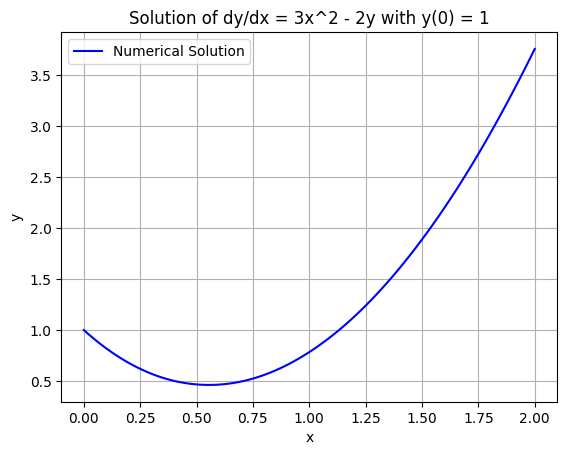

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE function
def dydx(x, y):
    return 3*x**2 - 2*y

# Initial condition
x0, y0 = 0, 1

# Define the range of x values
x_span = (x0, 2)  # Solve from x = 0 to x = 2
x_eval = np.linspace(x0, 2, 100)

# Solve the ODE numerically
solution = solve_ivp(dydx, x_span, [y0], t_eval=x_eval)

# Plot the solution
plt.plot(solution.t, solution.y[0], label='Numerical Solution', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Solution of dy/dx = 3x^2 - 2y with y(0) = 1")
plt.legend()
plt.grid()
plt.show()


## 22.2 Reduction of Order
The Reduction of Order method is used to find a second solution to a second-order linear differential equation when one solution is already known.

### Example
Given the equation:
\[ x^2 y'' - 4xy' + 6y = 0 \]
with a known solution \( y_1 = x^2 \), we find a second solution \( y_2 = v(x) y_1 \).

In [2]:
from sympy import Function, dsolve, Derivative

v = Function('v')(x)
y2 = v * x**2

# Compute derivatives
y2_prime = y2.diff(x)
y2_double_prime = y2_prime.diff(x)

# Define the ODE
ode = x**2 * y2_double_prime - 4*x*y2_prime + 6*y2

# Solve for v
v_eq = sp.simplify(ode.subs(y2, v*x**2).doit())
dsolve(v_eq)

Eq(v(x), C1 + C2*x)

## 22.3 The Euler Method
The Euler method is a numerical technique for solving first-order initial value problems of the form:
$[ \frac{dy}{dx} = f(x, y),\quad y(x_0) = y_0 ]$

### Example
Using Euler's method, approximate the solution to the IVP:
$[ \frac{dy}{dx} = x + y, \quad y(0) = 1 ]$
over the interval $( x \in [0, 1] )$ with step size $( h = 0.1 )$.

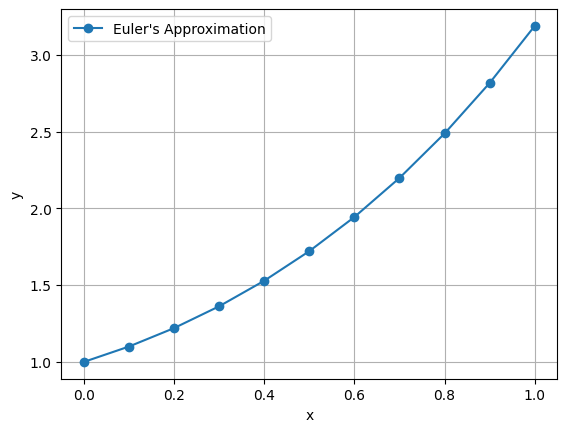

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(x, y):
    return x + y

# Euler's method implementation
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

# Solve and plot
x_vals, y_vals = euler_method(f, 0, 1, 0.1, 1)

plt.plot(x_vals, y_vals, marker='o', label="Euler's Approximation")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()